**Import the necessary libraries**

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Import the dataset:**

In [2]:
df = pd.read_csv('/content/advertising.csv')

# **Data Preprocessing:**

In [6]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [5]:
df.shape

(200, 4)

In [9]:
df.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [10]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


**Check if null values are present:**

In [12]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

**No null values are present in the dataset. Hence, no need of cleaning**

# **Data Visualization:**

**Compare sales with all the other attributes so as to understand correlation with each**

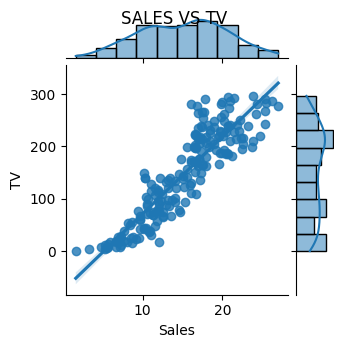

In [38]:
sns.jointplot(x='Sales', y='TV', data=df, kind='reg', height=3.5)
plt.suptitle('SALES VS TV')
plt.show()

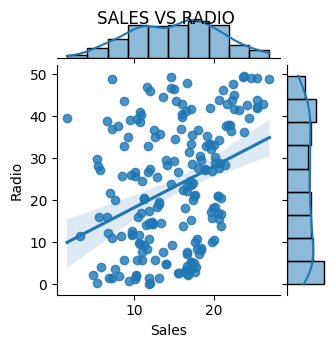

In [37]:
sns.jointplot(x='Sales', y='Radio', data=df, kind='reg', height=3.5)
plt.suptitle('SALES VS RADIO')
plt.show()

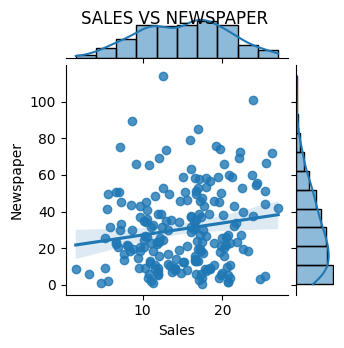

In [39]:
sns.jointplot(x='Sales', y='Newspaper', data=df, kind='reg', height=3.5)
plt.suptitle('SALES VS NEWSPAPER')
plt.show()

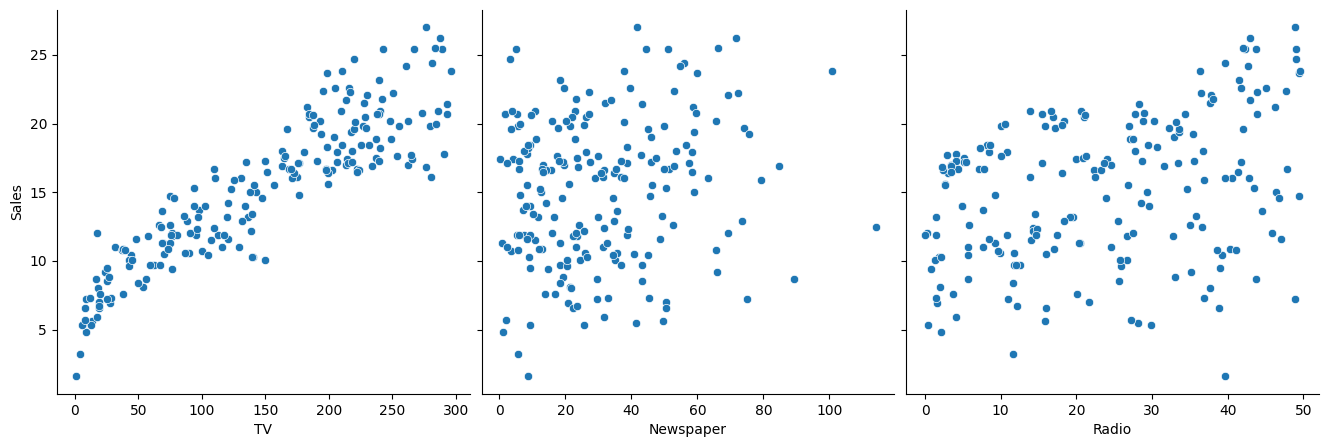

In [43]:
sns.pairplot(df, x_vars=['TV','Newspaper','Radio'], y_vars='Sales', height=4.5, aspect=1, kind='scatter')
plt.show()

**It can be observed that sales is most influenced by advertising through TV rather than newspaper or radio.**
**i.e, the variable TV is the most correlated with sales.**

# **Model Building:**

In [58]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

**Split the dataset into training and testing:**

In [49]:
X = df.drop('Sales', axis=1)
y=df['Sales']

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [64]:
X_train.size

480

In [65]:
X_test.size

120

**Create a Linear Regression Model**

In [52]:
lm = LinearRegression()

In [53]:
lm.fit(X_train, y_train)

LinearRegression()

In [54]:
predictions = lm.predict(X_test)

**Checking Root Mean Squared Error**

In [68]:
np.sqrt(mean_squared_error(y_test, predictions))

1.698214495830645

**Checking R-squared on the test set**

In [59]:
r2 = r2_score(y_test, predictions)
r2

0.8899791522455105